# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Ames Housing dataset 

The dataset is available in the file `'ames.csv'`. 

- Import the dataset and examine its dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv ('ames.csv')

# Print the dimensions of data
print (data.shape)


# Check out the info for the dataframe
print (data.info ())

# Show the first 5 rows
print (data.head ())


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

## Identify features and target data 

In this lab, we will use using 3 predictive continuous features:

#### Features

- `LotArea`: Lot size in square feet
- `1stFlrSF`: Size of first floor in square feet
- `GrLivArea`: Above grade (ground) living area square feet

#### Target

- `SalePrice`', the sale price of the home, in dollars

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents of both the features and the target variable

In [2]:
# Features and target data
target = data.SalePrice
features = data[['LotArea', '1stFlrSF', 'GrLivArea']]

## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

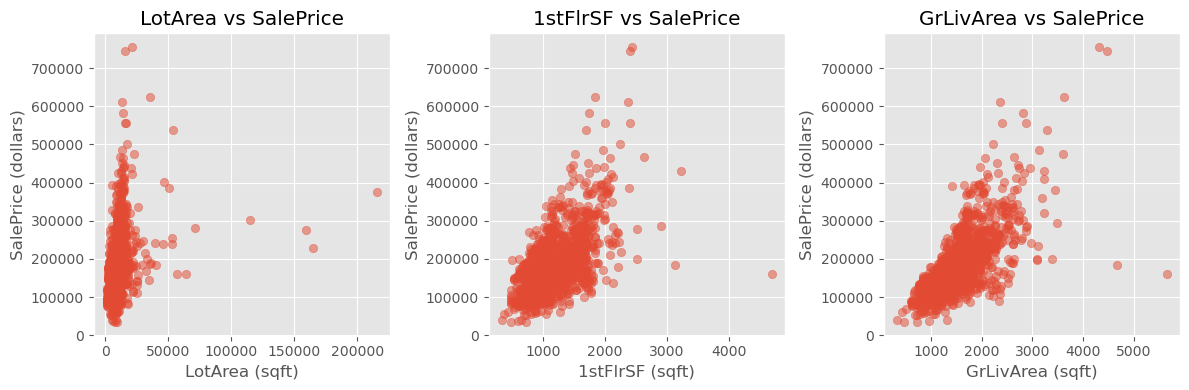

In [3]:
# Create scatter plots
plt.figure (figsize = (12, 4))
# Scatter plot for LotArea vs SalePrice
plt.subplot (131)
plt.scatter(features['LotArea'], target, alpha=0.5)
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea (sqft)')
plt.ylabel('SalePrice (dollars)')
# Scatter plot for 1stFlrSF vs SalePrice
plt.subplot (132)
plt.scatter (features ['1stFlrSF'], target, alpha = 0.5)
plt.title ('1stFlrSF vs SalePrice')
plt.xlabel ('1stFlrSF (sqft)')
plt.ylabel ('SalePrice (dollars)')
# Scatter plot for GrLivarea Vs SalePrice
plt.subplot (133)
plt.scatter (features ['GrLivArea'], target, alpha = 0.5)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (sqft)')
plt.ylabel('SalePrice (dollars)')

plt.tight_layout()
plt.show()


In [4]:
#.LotArea vs SalePrice:
#The scatter plot shows a wide spread of data points, indicating that there is no strong linear relationship between LotArea and SalePrice.
#SalePrice varies across a wide range for different LotArea values.
#There are some outliers with very large LotArea values that have relatively low SalePrice.

In [5]:
#1stFlrSF vs SalePrice:

#There appears to be a moderate positive linear relationship between 1stFlrSF (size of the first floor) and SalePrice.
#As 1stFlrSF increases, SalePrice tends to increase, suggesting that larger first-floor areas are associated with higher sale prices.
#There are some outliers with large 1stFlrSF values that have relatively low SalePrice.

In [6]:
#GrLivArea vs SalePrice:

#There is a strong positive linear relationship between GrLivArea (above grade living area) and SalePrice.
#As GrLivArea increases, SalePrice tends to increase significantly, indicating that larger above-grade living areas are associated with higher sale prices.
#There are fewer outliers in this plot compared to the others, suggesting that GrLivArea is a strong predictor of SalePrice.
#These scatter plots provide insights into how each feature relates to the target variable, which can be useful in further analysis and modeling.

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return both the R-squared score and Root Mean Squared Error (RMSE) for two equal-sized arrays for the given true and predicted values 
    - Depending on your version of sklearn, in order to get the RMSE score you will need to either set `squared=False` or you will need to take the square root of the output of the `mean_squared_error` function - check out [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) or this helpful and related [StackOverflow post](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)
    - The benefit of calculating RMSE instead of the Mean Squared Error (MSE) is that RMSE is in the same units at the target - here, this means that RMSE will be in dollars, calculating how far off in dollars our predictions are away from the actual prices for homes, on average

In [8]:
# Import metrics

from sklearn.metrics import r2_score, mean_squared_error
# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score (y_true, y_predict)
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error (y_true, y_predict)
    rmse = np.sqrt (mse)

    # Return the score
    return r2, rmse


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.6870225614927066]

(0.9228556485355649, 0.6870225614927066)

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [10]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split (features, target, test_size =0.2, random_state = 42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [11]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor (random_state = 45)

# Fit the model to training data
regressor.fit (x_train, y_train)
# Make predictions on the test data
y_pred = regressor.predict (x_test)

# Calculate performance using the performance() function 
score = performance (y_test, y_pred)
score

# [0.5961521990414137, 55656.48543887347] - R2, RMSE

(0.5961521990414137, 55656.48543887347)

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate RMSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

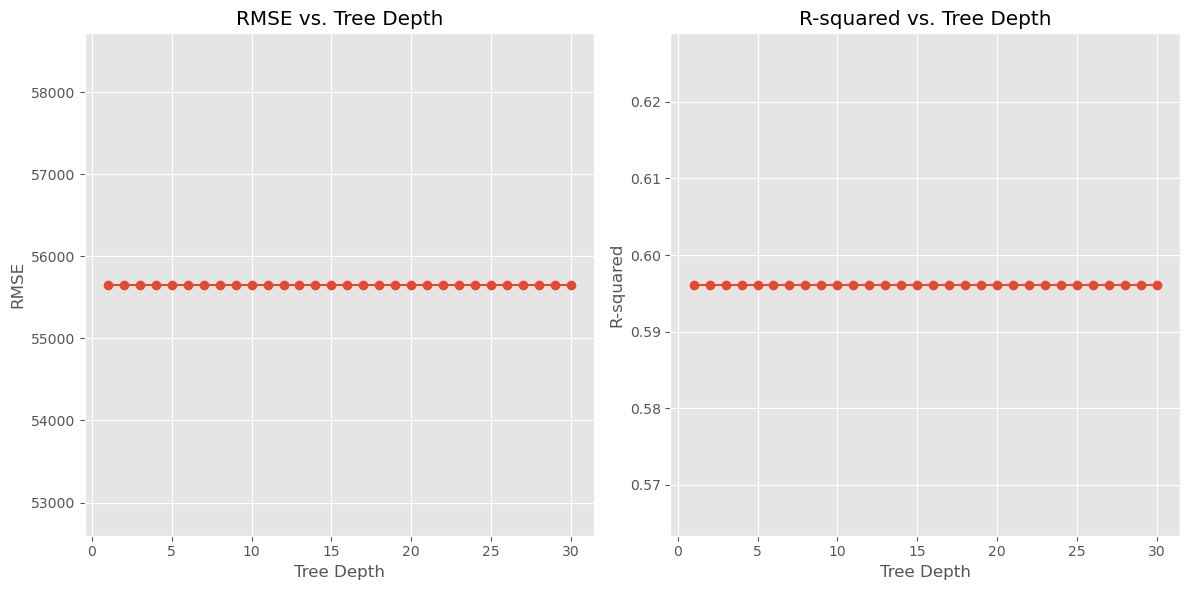

In [13]:
# Your code here 
depth_range = range (1,31)
rmse_scores = []
r2_scores = []
#loop through different tree depths
for depth in depth_range:
    regressor = DecisionTreeRegressor (max_depth = depth, random_state = 45)
    regressor.fit (x_train, y_train)
    y_prep= regressor.predict (x_test)
    
    
    # Calculate performance measures using the function you created
    r2_score_value, rmse_score = performance(y_test, y_pred)
    
    # Append the scores to the lists
    r2_scores.append(r2_score_value)
    rmse_scores.append(rmse_score)

# Plot RMSE and R-squared scores for different tree depths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(depth_range, rmse_scores, marker='o', linestyle='-')
plt.title('RMSE vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(depth_range, r2_scores, marker='o', linestyle='-')
plt.title('R-squared vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

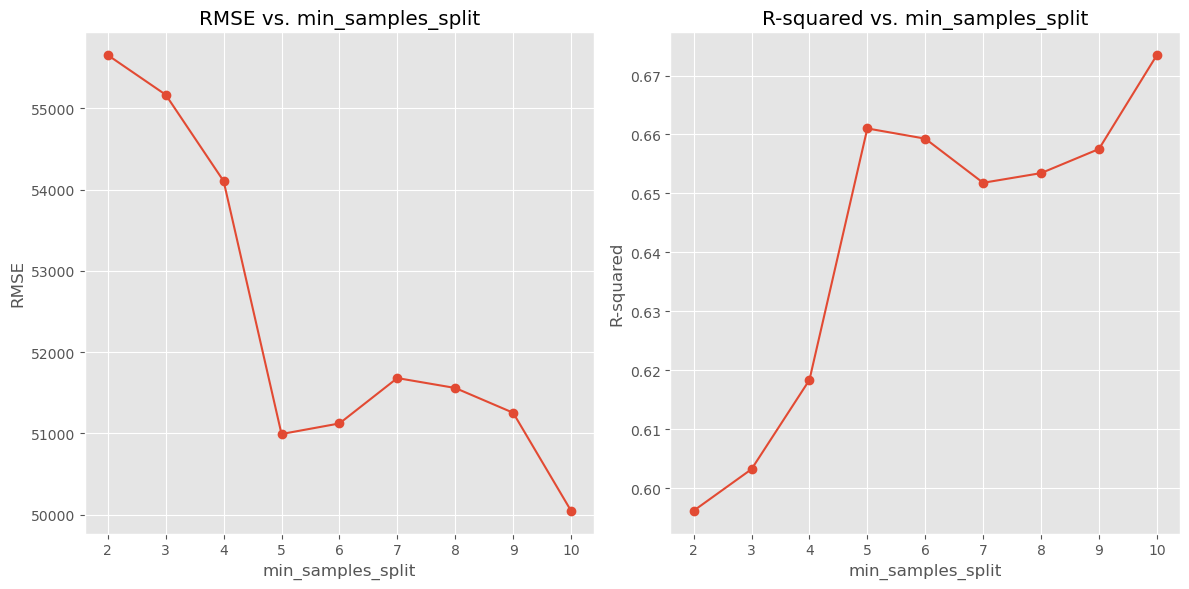

In [14]:
# Your code here 
# Define the range of min_samples_split values to try
min_samples_split_range = range(2, 11)

# Initialize empty lists to store RMSE and R-squared values
rmse_scores = []
r2_scores = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_range:
    # Create a DecisionTreeRegressor with the specified min_samples_split and random_state
    tree_regressor = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=45)
    
    # Fit the model on the training data
    tree_regressor.fit(x_train, y_train)
    
    # Generate predictions on the test dataset
    y_pred = tree_regressor.predict(x_test)
    
    # Calculate performance measures using the function you created
    r2_score_value, rmse_score = performance(y_test, y_pred)
    
    # Append the scores to the lists
    r2_scores.append(r2_score_value)
    rmse_scores.append(rmse_score)

# Plot RMSE and R-squared scores for different min_samples_split values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(min_samples_split_range, rmse_scores, marker='o', linestyle='-')
plt.title('RMSE vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(min_samples_split_range, r2_scores, marker='o', linestyle='-')
plt.title('R-squared vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [ ]:
# Your code here 

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like `max_features` to find a more optimal version of the model 

In [ ]:
# Your code here 

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Ames Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 